In [18]:
# Implementation of a simple Twiddle Algorithm with Simple stock data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Let us get the stock prices of around 5 companies which we thing might have some relation to each other
# TATA STEEL
# ONGC
# DLF
# SBI
# MMTC
import pandas as pd
TATA=pd.read_csv('http://real-chart.finance.yahoo.com/table.csv?s=TATASTEEL.NS&d=11&e=26&f=2016&g=d&a=8&b=17&c=2011&ignore=.csv')
ONGC=pd.read_csv('http://real-chart.finance.yahoo.com/table.csv?s=ONGC.NS&d=11&e=26&f=2016&g=d&a=8&b=17&c=2011&ignore=.csv')
DLF=pd.read_csv('http://real-chart.finance.yahoo.com/table.csv?s=DLF.NS&d=11&e=26&f=2016&g=d&a=8&b=17&c=2011&ignore=.csv')
SBI=pd.read_csv('http://real-chart.finance.yahoo.com/table.csv?s=SBIN.NS&d=11&e=26&f=2016&g=d&a=8&b=17&c=2011&ignore=.csv')
MMTC=pd.read_csv('http://real-chart.finance.yahoo.com/table.csv?s=MMTC.NS&d=11&e=26&f=2016&g=d&a=8&b=17&c=2011&ignore=.csv')

# Prepare the data frame
data=pd.DataFrame(data={'tata':TATA['Close'],'ongc':ONGC['Close'],'dlf':DLF['Close'],'sbi':SBI['Close'],'mmtc':MMTC['Close']})

# Convert the data to returns
data=data.apply(lambda x : x/x.shift(1) -1,axis=0)
data=data[1:len(data)]

In [83]:
# We will now be implementing the Twiddle algorithm
import numpy as np

def errorFunction(data,vectorArray):
    squares=(np.dot(data[['dlf','mmtc','ongc','sbi']],np.array(vectorArray).T) - data['tata'] ) ** 2
    return np.sum(squares)

def twiddle(data,weights,dweights,weightPosDelta,weightNegDelta,debug=False):
    counter=0
    weightHistory=pd.DataFrame(columns=('dlf','mmtc','ongc','sbi'))
    for i in  range(len(weights)):
        bestError=errorFunction(data,weights)
        while(1):
            counter=counter+1
            weightHistory.loc[counter]=weights
            weights[i]=weights[i] + dweights[i]
            error=errorFunction(data,weights)
            if(abs(error - bestError) < 0.0001):
                break
            if(error < bestError):
                bestError=error
                dweights[i]=dweights[i]*(1+weightPosDelta)
            else:
                weights[i]=weights[i] - (2 * dweights[i])
                error=errorFunction(data,weights)
                if(error > bestError):
                    weights[i]=weights[i] + dweights[i]
                    dweights[i]=dweights[i] * (1-weightNegDelta)
                else:
                    bestError=error
            if(debug):
                print("The weights are {} and the error is {} ".format(weights,error))    
        
    # We will plot the individual weights  
    plt.figure(figsize=(20,10))
    plt.plot(weightHistory['dlf'],color='b',label='DLF')
    plt.plot(weightHistory['mmtc'],color='r',label='MMTC')
    plt.plot(weightHistory['ongc'],color='y',label='ONGC')
    plt.plot(weightHistory['sbi'],color='g',label='SBI')
    plt.legend()
    plt.ylabel('Weights of the explanatory variables')
    plt.xlabel('Counter Index')
    plt.title('Variation of weights')
    plt.show()
    # We will plot the final curve
    plt.figure(figsize=(20,10))
    plt.plot(data['tata'],color='b',label='Actual')
    plt.plot(np.dot(data[['dlf','mmtc','ongc','sbi']],np.array(weights).T),color='r',label='Twiddle')
    plt.legend()
    plt.ylabel('Price TATA STEEL')
    plt.xlabel('Date Index')
    plt.title('Actual vs Predicted')
    plt.show()
    return(weights)


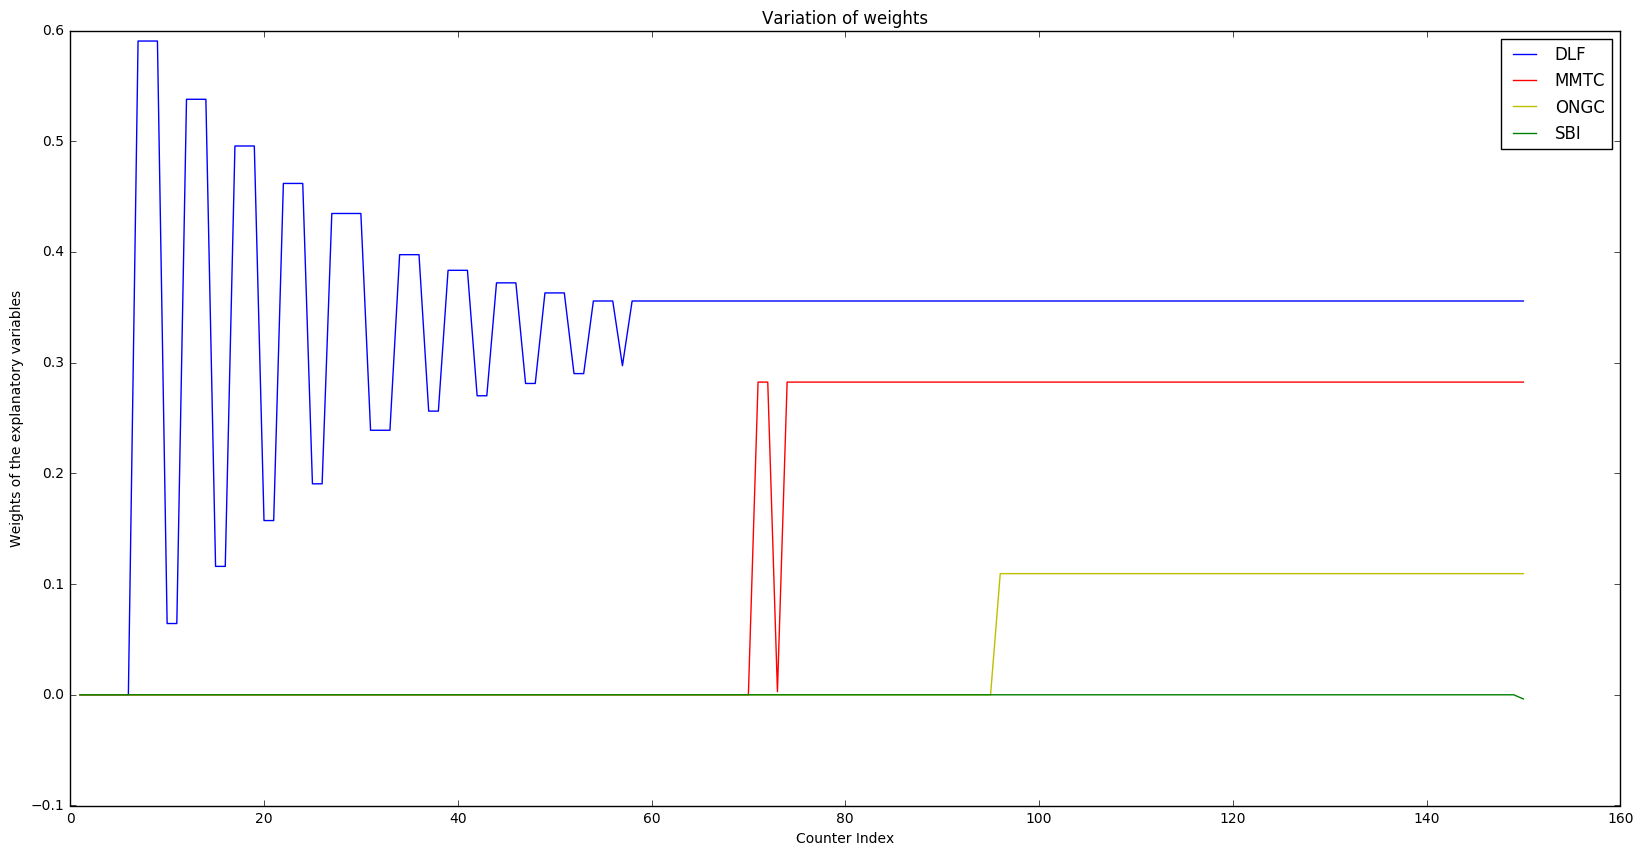

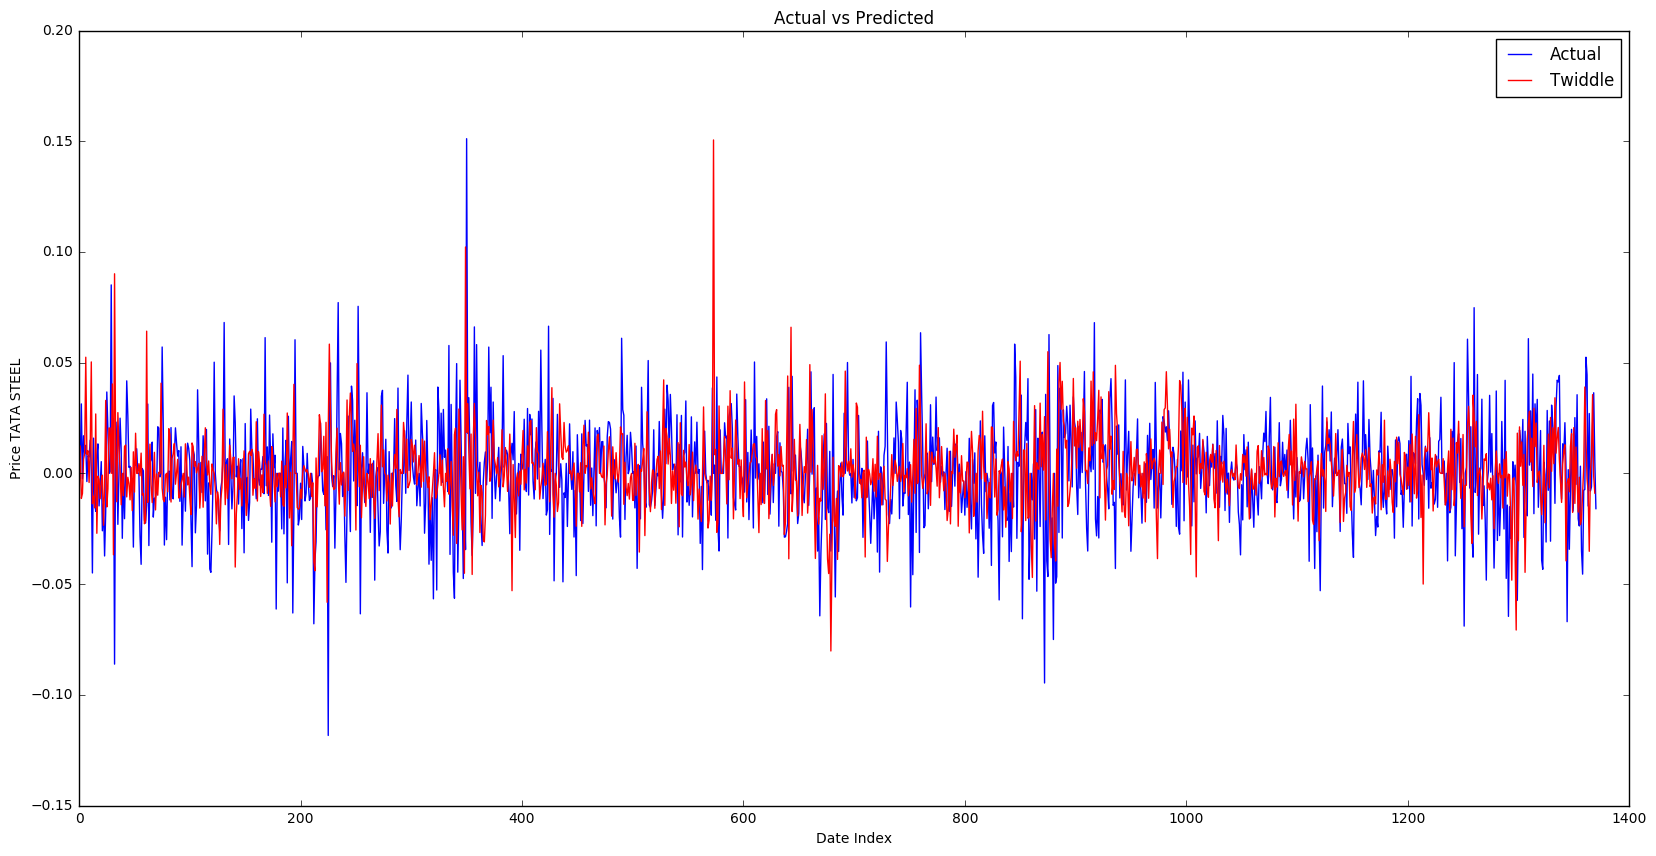

[0.35568629351428943, 0.28242953648100017, 0.10941898913151243, 0.0]


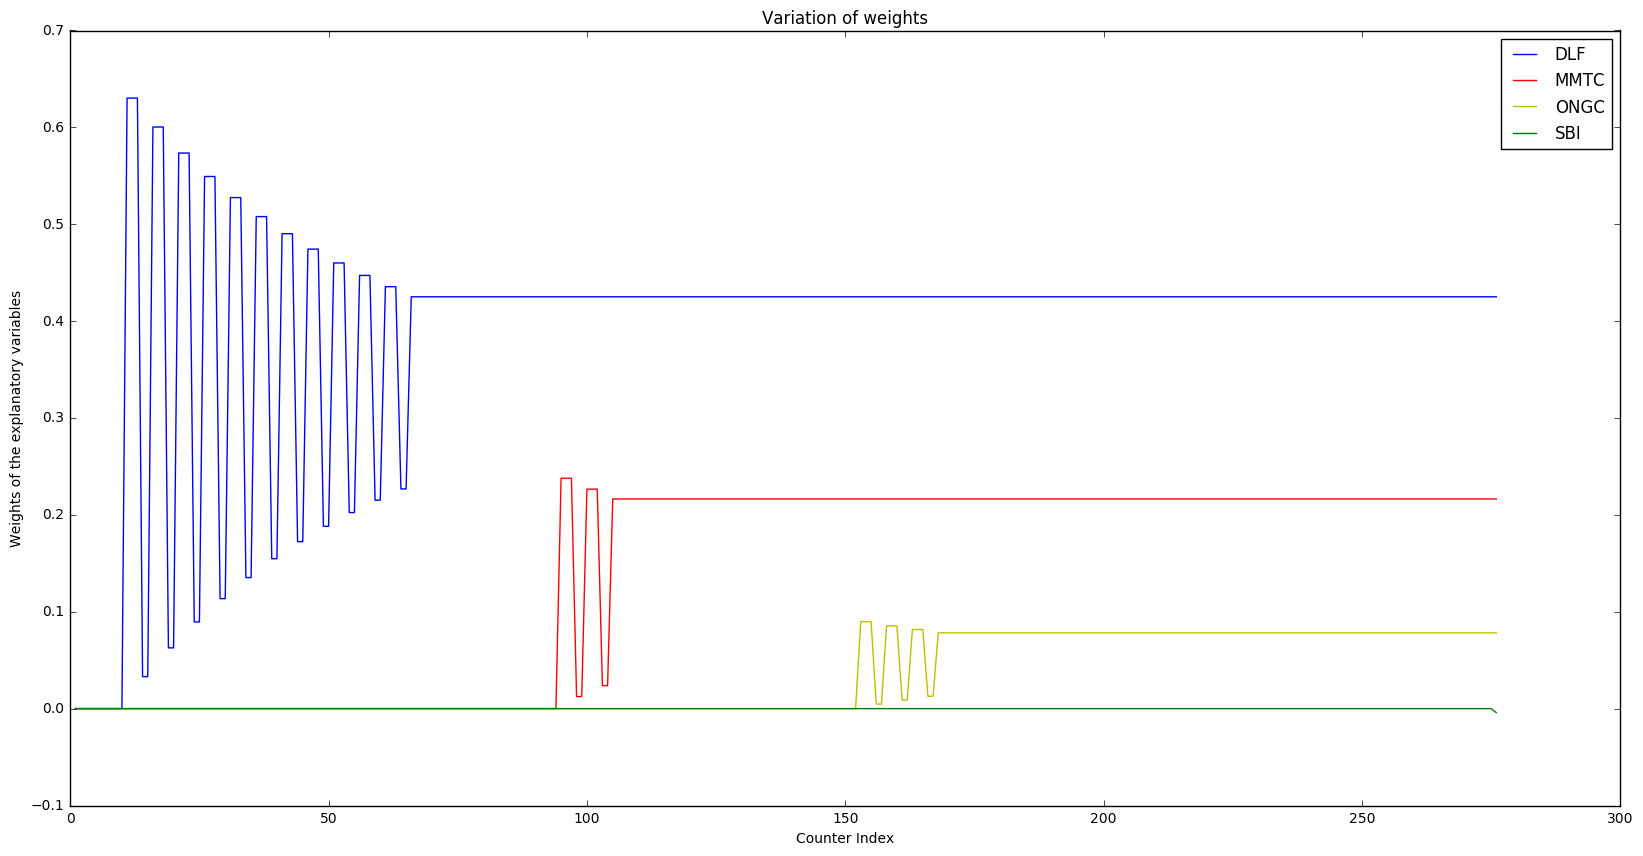

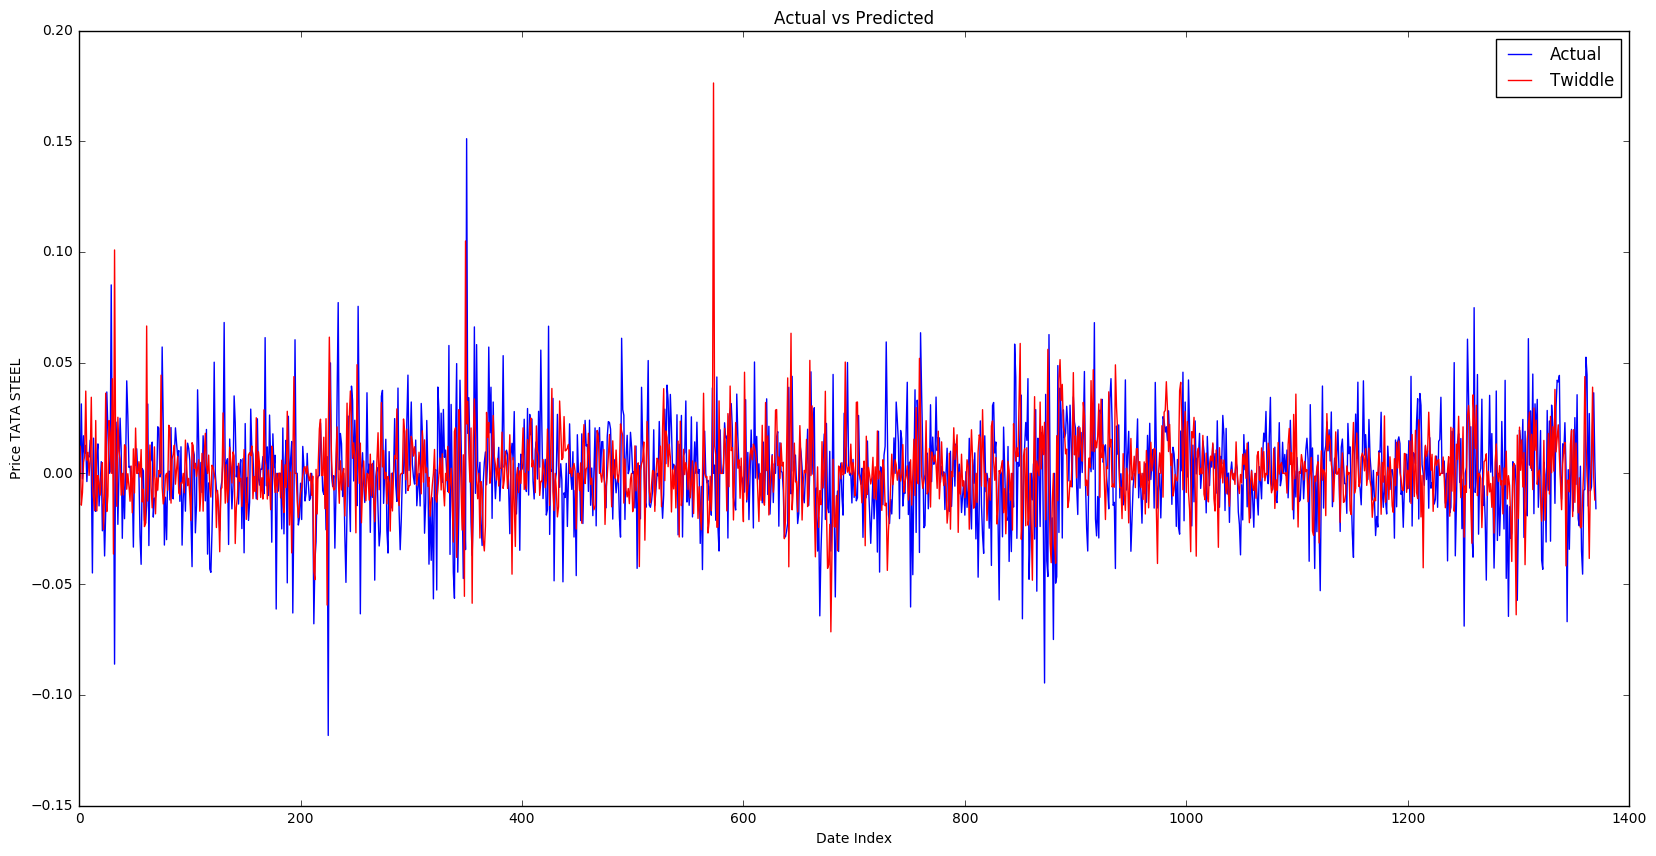

[0.4251190479022816, 0.2164139218465918, 0.07821840705490392, 0.0]


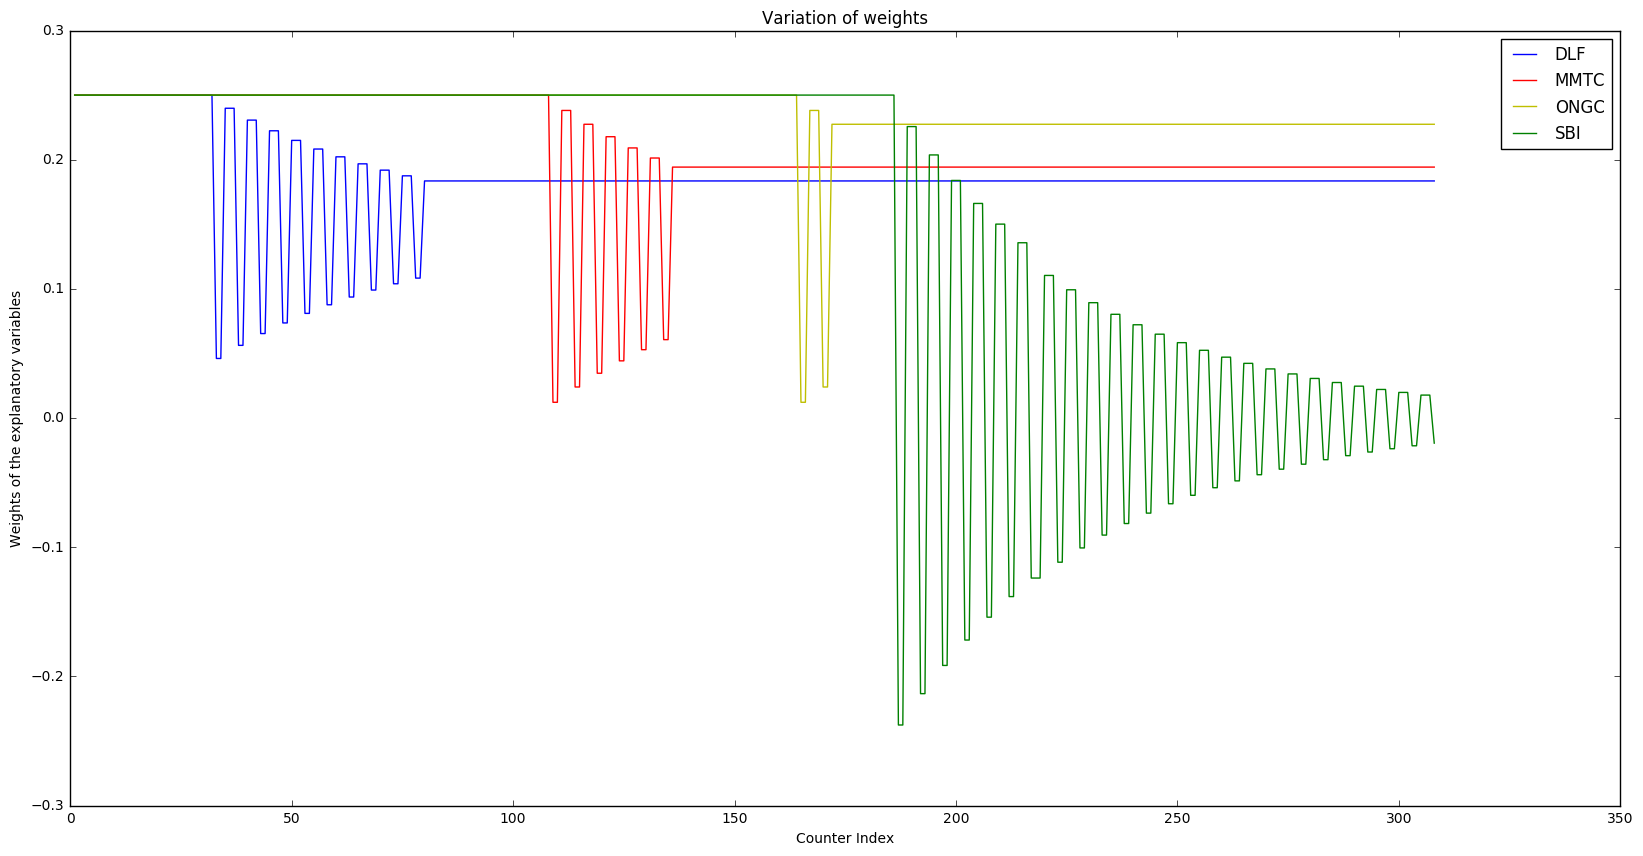

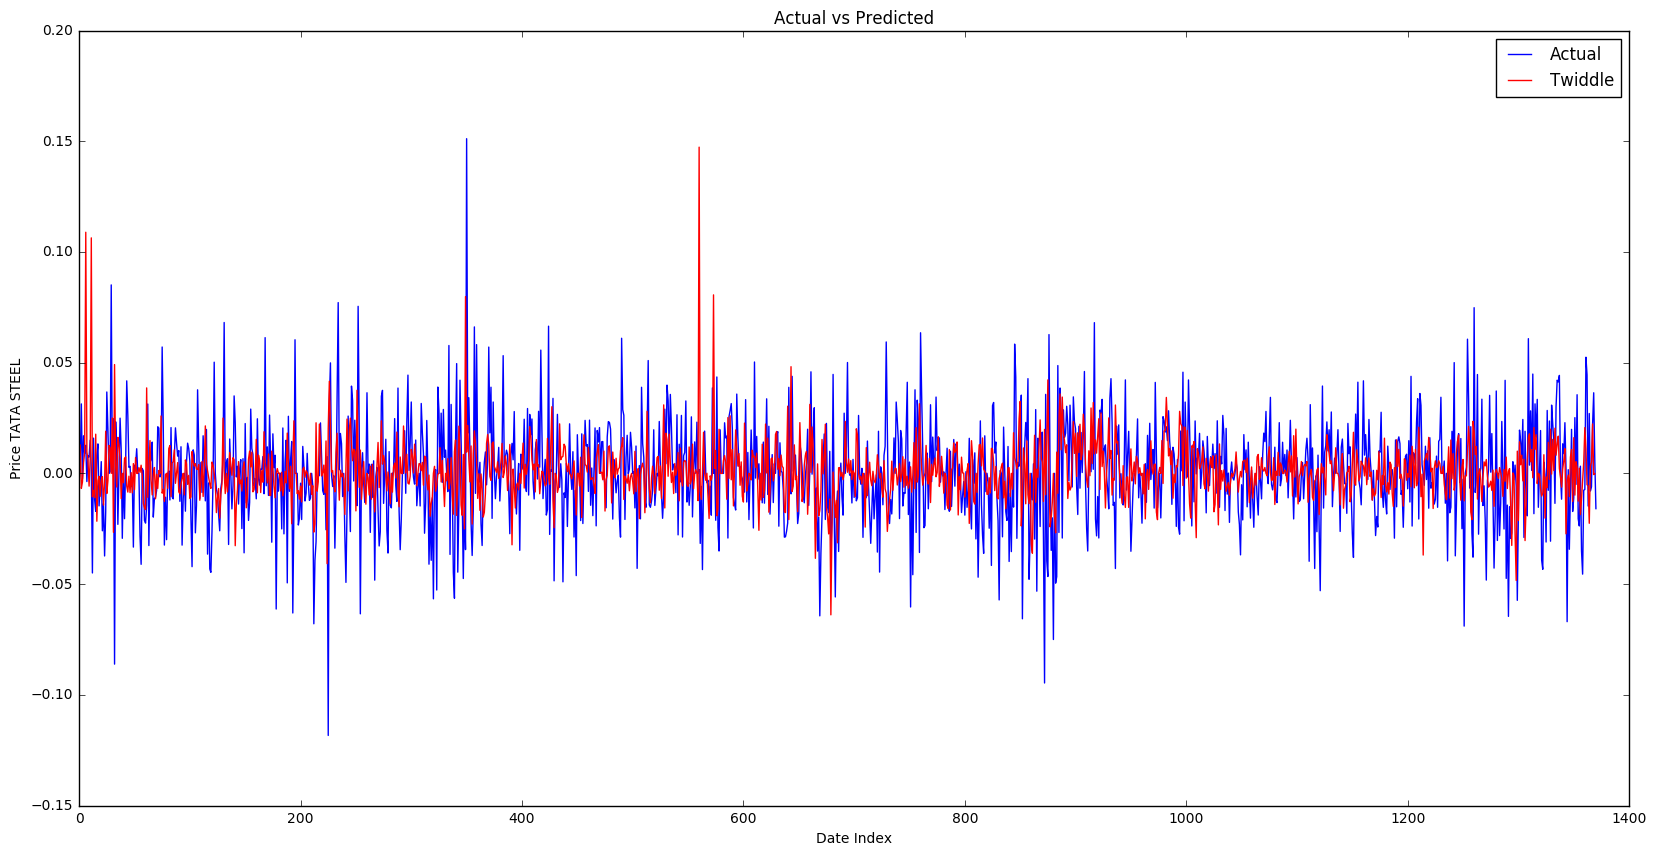

[0.1835299191175714, 0.194248905151882, 0.2274035473855794, 0.017736233019791936]


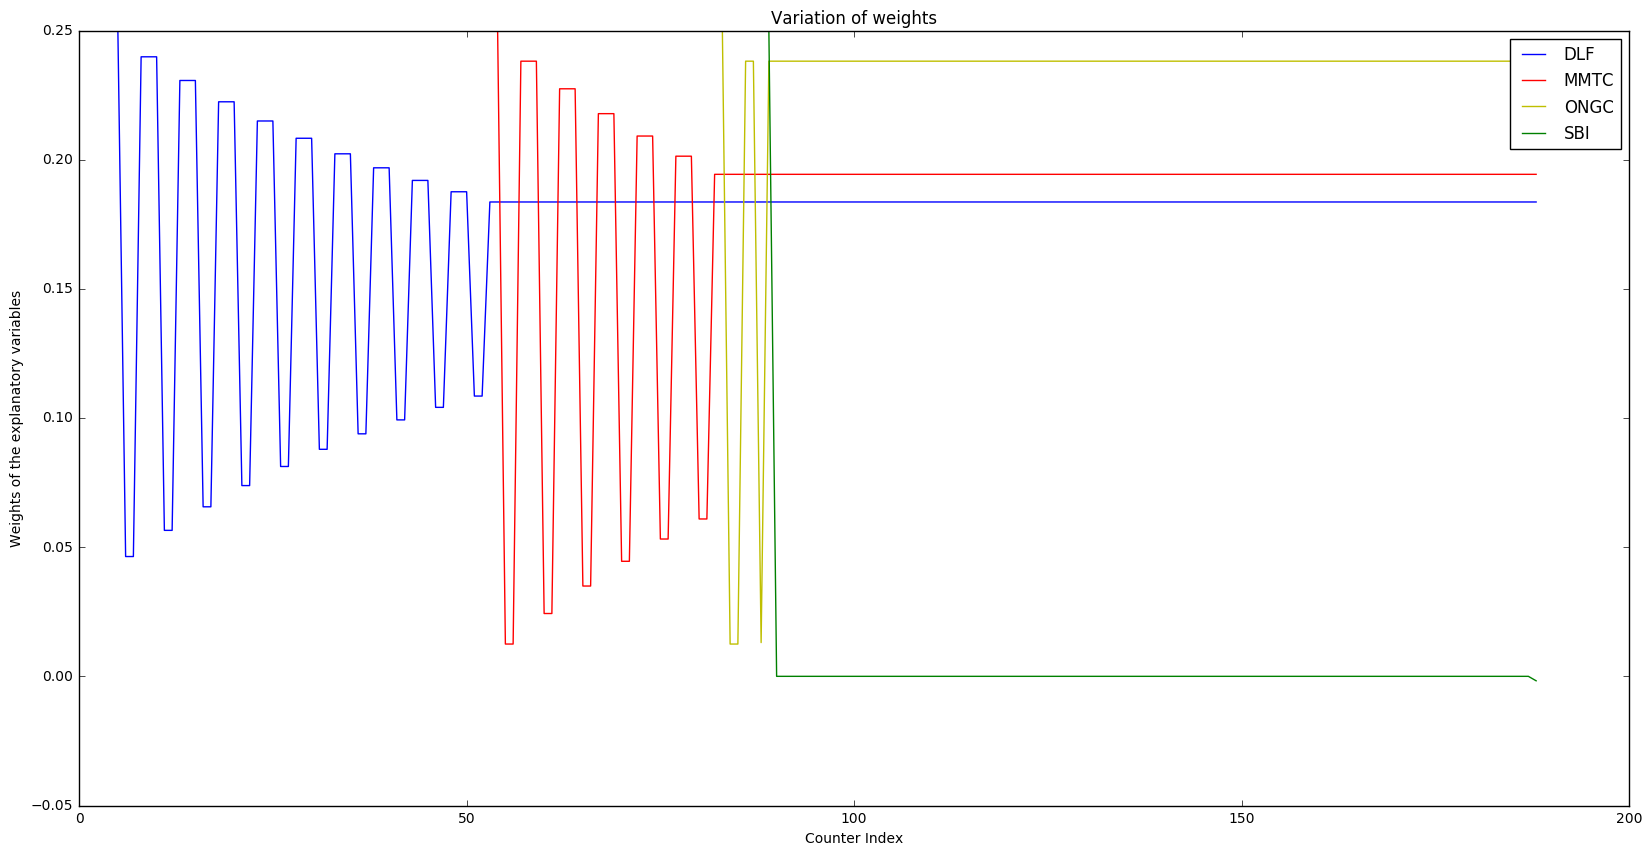

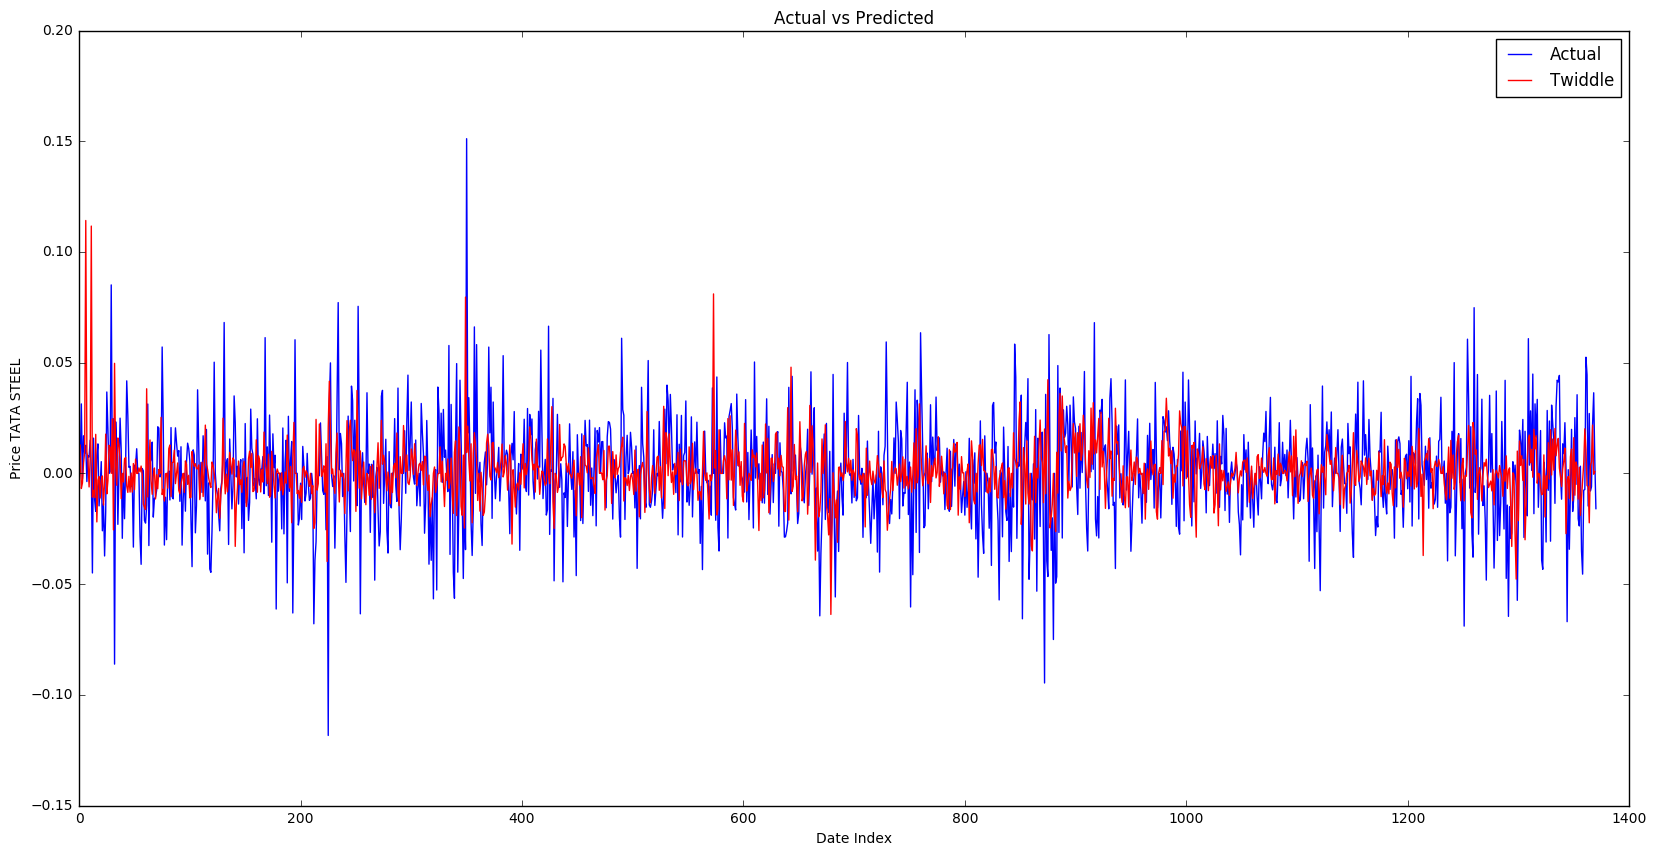

[0.1836212800641601, 0.1943255332036469, 0.23812500000000003, 0.0]


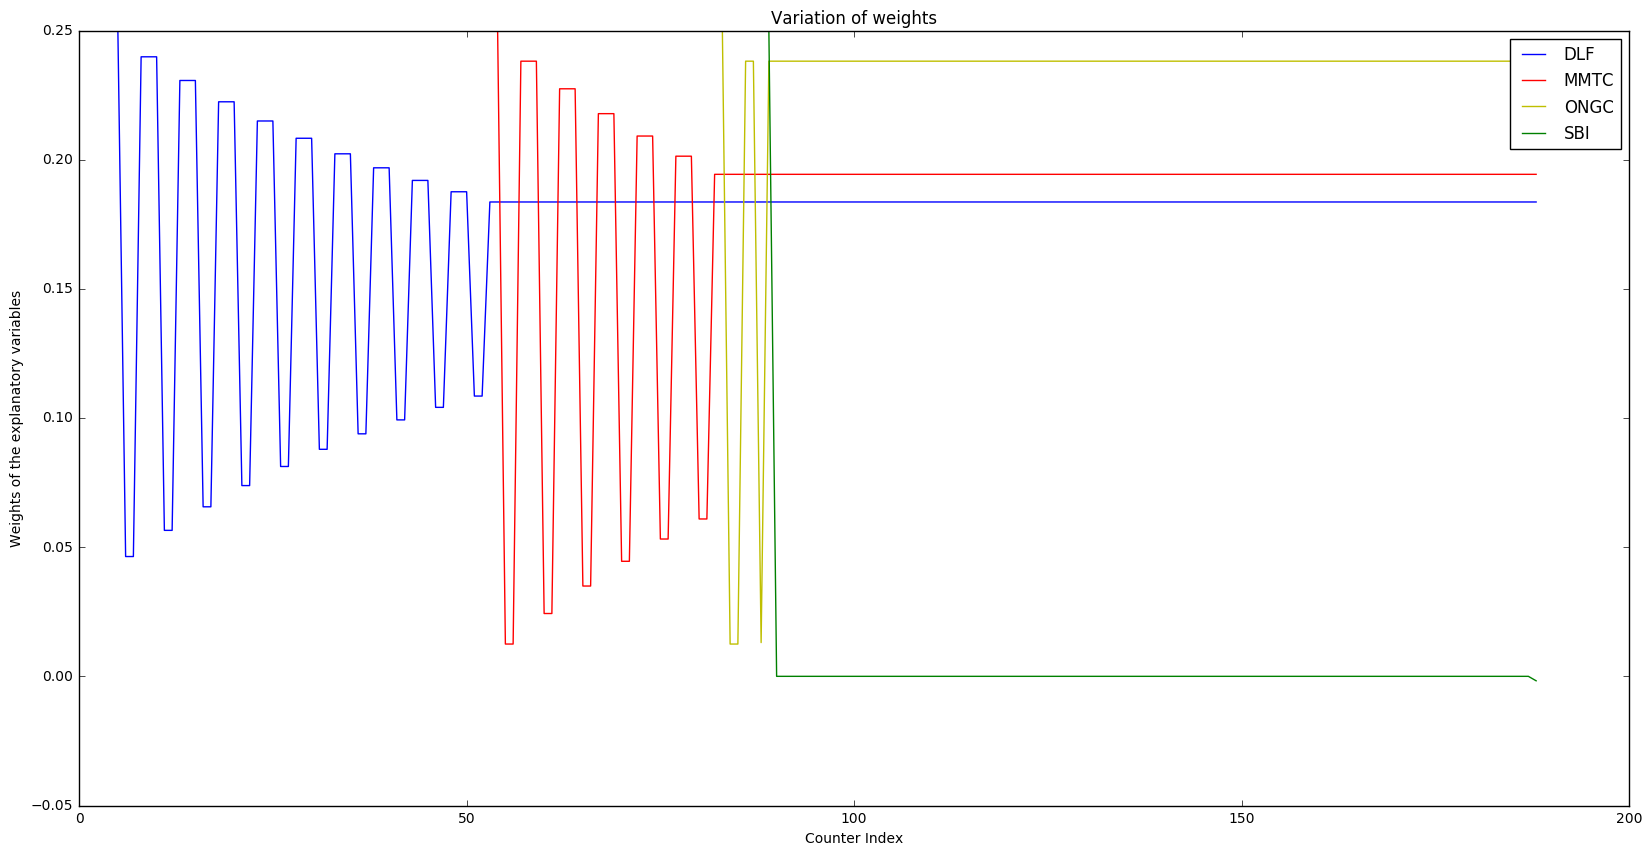

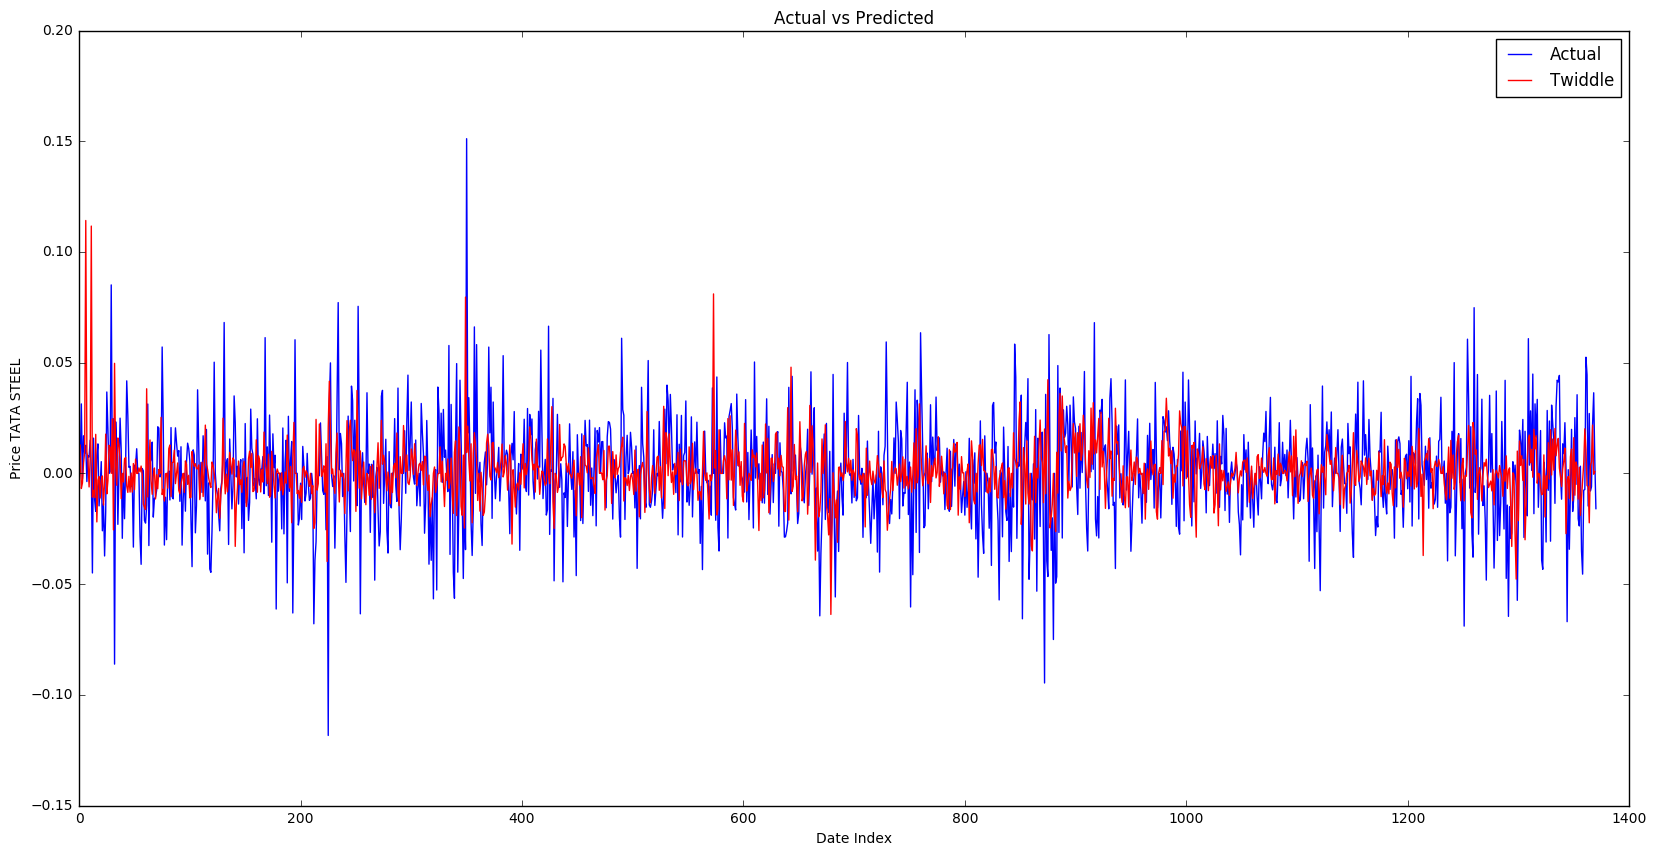

[0.1836212800641601, 0.1943255332036469, 0.23812500000000003, 0.0]


In [85]:
# Visualization of the above algorithm

weights=[0,0,0,0]
dweights=[1,1,1,1]
twiddle_weights=twiddle(data,weights,dweights,0.1,0.1)
print(twiddle_weights)
#0.35568629351428943, 0.28242953648100017, 0.10941898913151243, 0.0
#'dlf','mmtc','ongc','sbi'

weights=[0,0,0,0]
dweights=[1,1,1,1]
twiddle_weights=twiddle(data,weights,dweights,0.05,0.05)
print(twiddle_weights)
#0.2846716484565429, 0.19551822814917338, 0.10855339821468196, 0.0
#'dlf','mmtc','ongc','sbi'

weights=[0.25,0.25,0.25,0.25]
dweights=[1,1,1,1]
twiddle_weights=twiddle(data,weights,dweights,0.05,0.05)
print(twiddle_weights)

weights=[0.25,0.25,0.25,0.25]
dweights=[0.25,0.25,0.25,0.25]
twiddle_weights=twiddle(data,weights,dweights,0.05,0.05)
print(twiddle_weights)

weights=[0.25,0.25,0.25,0.25]
dweights=[0.25,0.25,0.25,0.25]
twiddle_weights=twiddle(data,weights,dweights,0.05,0.05)
print(twiddle_weights)
